In [415]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.misc import imread, imresize, imshow
import cv2
import os
import time
from hashlib import md5
import scipy

In [416]:
IMAGE_DIR = 'C:/Users/hp/Desktop/traffic/'

os.chdir(IMAGE_DIR)
os.getcwd()


'C:\\Users\\hp\\Desktop\\traffic'

In [417]:
image_files = os.listdir(IMAGE_DIR)
print(len(image_files))

38


In [418]:
image_files[0]

'0.jpeg'

In [419]:
imread(image_files[0]).shape

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


(186L, 93L, 3L)

### Helper Functions



In [420]:
def filter_images(images):
    image_list = []
    for image in images:
        try:
            assert imread(image).shape[2] == 3
            image_list.append(image)
        except  AssertionError as e:
            print(e)
    return image_list
        

In [421]:
#First turn the image into a gray scale image
def img_gray(image):
    image = imread(image)
    return np.average(image, weights=[0.299, 0.587, 0.114], axis=2)

In [422]:
#resize image and flatten
def resize(image, height=30, width=30):
    row_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten()
    col_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten('F')
    return row_res, col_res

In [423]:
#gradient direction based on intensity 

def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res)
    difference_col = np.diff(col_res)
    difference_row = difference_row > 0
    difference_col = difference_col > 0
    return np.vstack((difference_row, difference_col)).flatten()
    #return difference_row
    #return np.vstack((difference_row, difference_col)) #str method

In [424]:
def difference_score(image, height = 30, width = 30):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)
    
    return difference

In [425]:
#Now Let's try Hamming distance

In [426]:
def hamming_distance(image, image2):
    score =scipy.spatial.distance.hamming(image, image2)
    return score

In [427]:
#Hamming

def difference_score_dict(image_list):
    ds_dict = {}
    duplicates = []
    for image in image_list:
        ds = difference_score(image)
        
        if image not in ds_dict:
            ds_dict[image] = ds
        else:
            duplicates.append((image, ds_dict[image]) )
    
    return  duplicates, ds_dict

In [428]:
image_files = filter_images(image_files)
duplicates, ds_dict =difference_score_dict(image_files)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [429]:
len(ds_dict.keys())

38

In [430]:
import itertools
for k1,k2 in itertools.combinations(ds_dict, 2):
    if hamming_distance(ds_dict[k1], ds_dict[k2])< .37:
        duplicates.append((k1,k2))

In [431]:
len(duplicates)

76

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


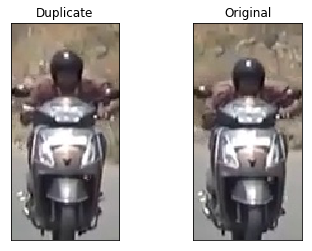

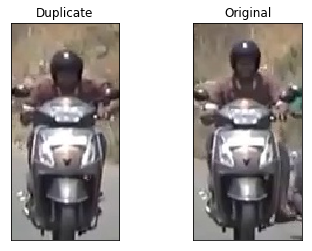

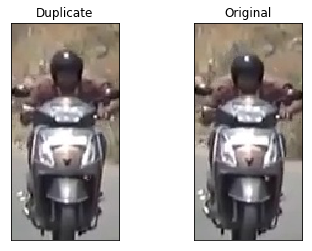

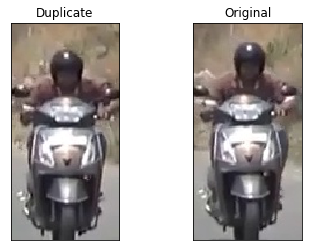

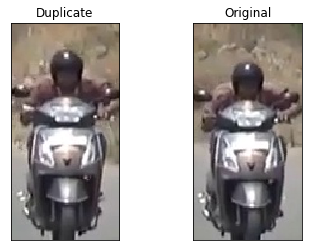

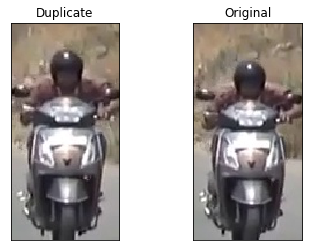

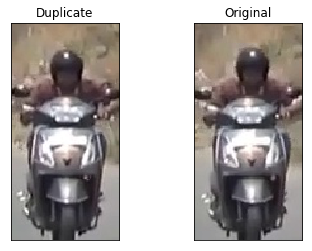

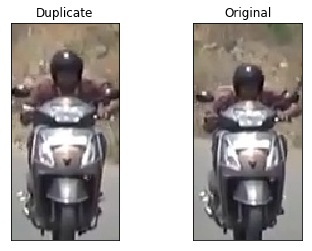

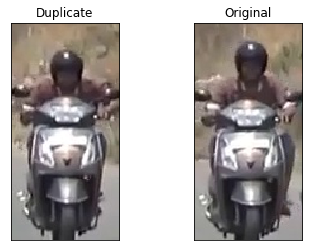

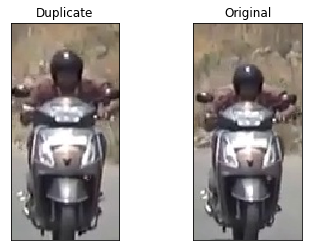

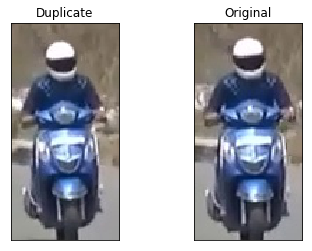

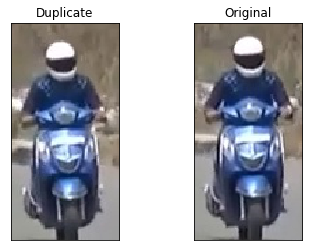

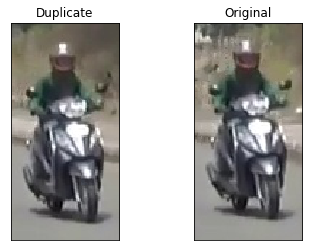

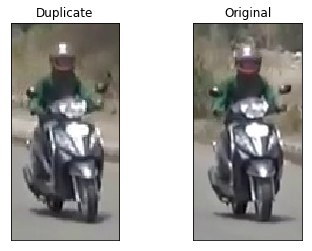

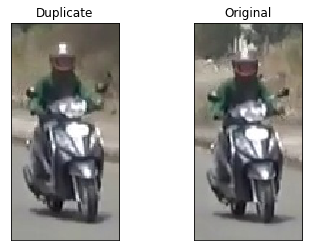

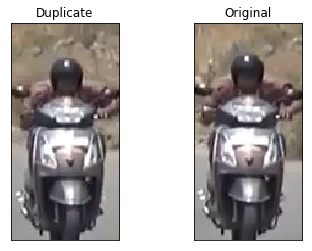

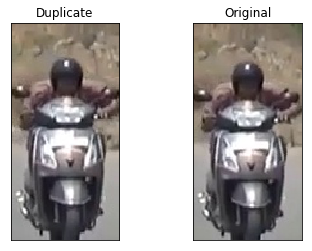

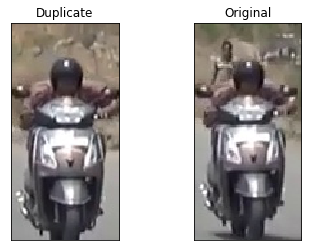

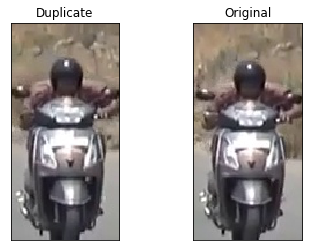

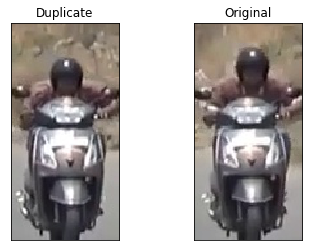

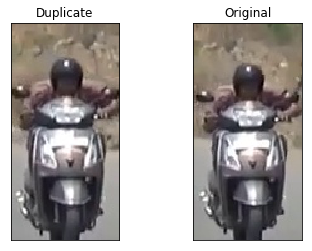

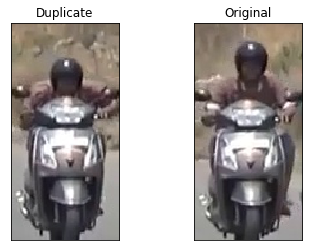

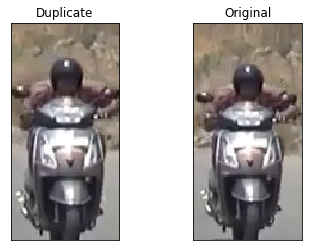

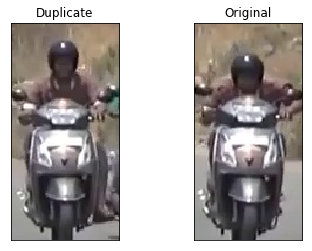

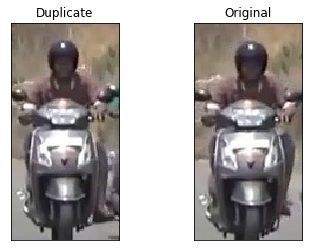

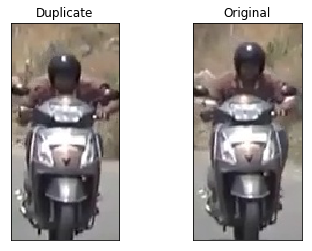

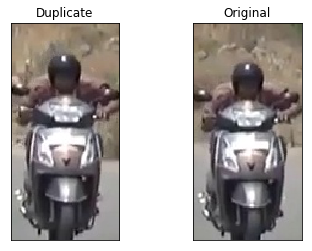

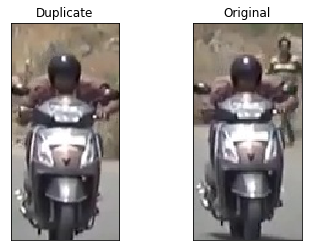

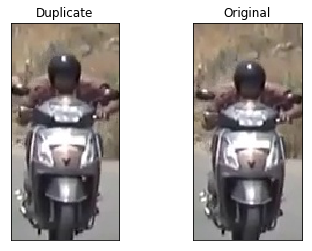

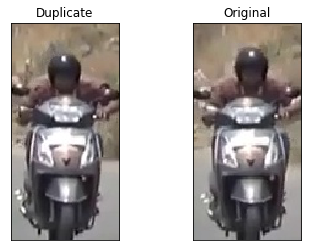

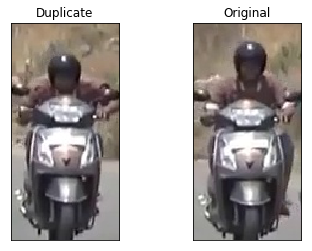

In [432]:
for file_names in duplicates[:31]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_names[0]))
        plt.title('Duplicate'), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue

In [433]:
delete = [x for y,x in duplicates]
delete = list(set(delete))
len(delete)

26

In [434]:
for i in range(len(delete)):
    print str(delete[i])
    os.remove(str(delete[i]))  #If we wanted to remove them`

22.jpeg
0.jpeg
1.jpeg
4.jpeg
6.jpeg
34.jpeg
24.jpeg
10.jpeg
30.jpeg
26.jpeg
29.jpeg
17.jpeg
31.jpeg
28.jpeg
18.jpeg
7.jpeg
11.jpeg
25.jpeg
15.jpeg
8.jpeg
19.jpeg
5.jpeg
2.jpeg
3.jpeg
33.jpeg
13.jpeg


In [435]:
str(delete[i][0])

'1'